# Rainfall Weather Forecasting

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,RandomizedSearchCV ,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(8425, 23)

In [5]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow are the six columns with object data type.
Date is shown an object type but it is of float type so we use DateTime method to split down. 
And left of the columns are continuous in nature.

                                   Check percentage value of missing columns

In [8]:
num=1
for col in data:
    if num <= 23:
        av=data[col].isnull().sum()/len(data[col])*100
        print(col,av)
    num+=1 

Date 0.0
Location 0.0
MinTemp 0.8902077151335311
MaxTemp 0.7121661721068249
Rainfall 2.8486646884272995
Evaporation 41.68545994065282
Sunshine 47.40652818991098
WindGustDir 11.762611275964392
WindGustSpeed 11.762611275964392
WindDir9am 9.839762611275965
WindDir3pm 3.6557863501483676
WindSpeed9am 0.9020771513353115
WindSpeed3pm 1.2700296735905046
Humidity9am 0.7002967359050445
Humidity3pm 1.2106824925816024
Pressure9am 15.537091988130564
Pressure3pm 15.572700296735906
Cloud9am 28.735905044510385
Cloud3pm 29.139465875370917
Temp9am 0.6646884272997032
Temp3pm 1.13946587537092
RainToday 2.8486646884272995
RainTomorrow 2.836795252225519


The percentege value of all columns are less than 80, so fill the values

                                       Imputing Technique

In [9]:
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp']=data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am']=data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm']=data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mean())
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

                                         Feature Enginering

In [10]:
data['Date']=pd.to_datetime(data['Date'])
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [11]:
data=data.drop(['Date'],axis=1)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   object 
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   object 
 9   WindDir3pm     8425 non-null   object 
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

# Data Visualisation

                                      Visualisation of categorical data

In [13]:
data_visualization_nominal=data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']].copy()

data_visualization_nominal.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

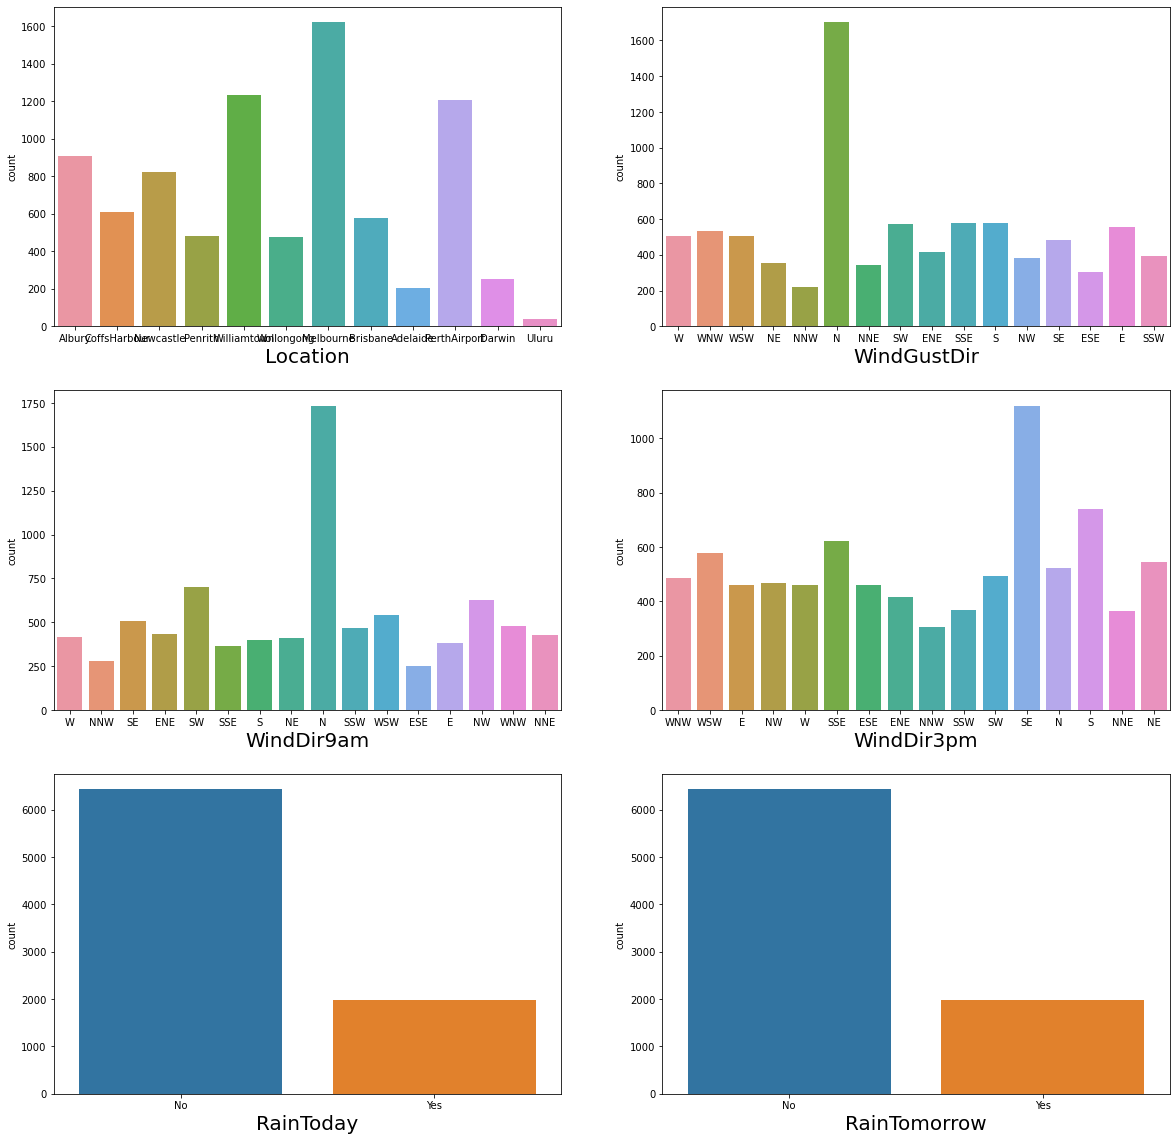

In [14]:
plt.figure(figsize=(20,20))
num =1

for column in data_visualization_nominal:
    if num <=6:
        ax = plt.subplot(3,2,num)
        sns.countplot(x=column,data=data_visualization_nominal)
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()  

In [15]:
data['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

The RainTomorrow column is an imbalance data.

                                    Visualisation of continuous data

In [16]:
data_visualization_continuous=data.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'],axis=1)

data_visualization_continuous.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year'],
      dtype='object')

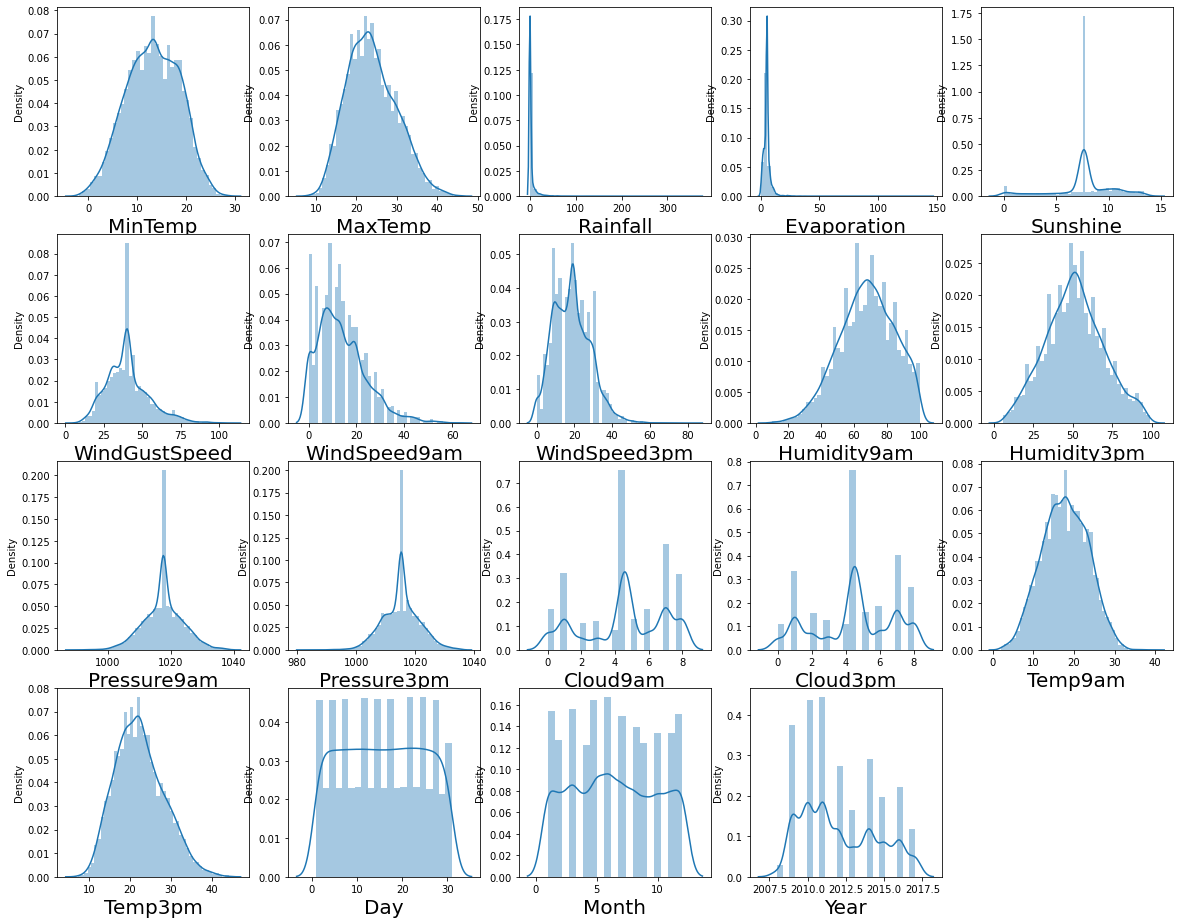

In [17]:
plt.figure(figsize=(20,16))
plotnumber =1

for column in data_visualization_continuous:
    if plotnumber <=19:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data_visualization_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()   

                                      Encoding Technique

In [18]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [19]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.9,0.6,5.389395,7.632205,13.0,44.0,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,1,12,2008
1,1.0,7.4,25.1,0.0,5.389395,7.632205,14.0,44.0,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2,12,2008
2,1.0,12.9,25.7,0.0,5.389395,7.632205,15.0,46.0,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,3,12,2008
3,1.0,9.2,28.0,0.0,5.389395,7.632205,4.0,24.0,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,4,12,2008
4,1.0,17.5,32.3,1.0,5.389395,7.632205,13.0,41.0,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5,12,2008


# Analysis

                                      Describe dataset

In [20]:
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,7.810445,...,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320,15.741958,6.442136,2012.102433
std,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,4.430162,...,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846,8.787354,3.437994,2.473137
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,...,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000,8.000000,3.000000,2010.000000
50%,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,8.000000,...,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000,16.000000,6.000000,2011.000000
75%,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,...,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000,23.000000,9.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,31.000000,12.000000,2017.000000


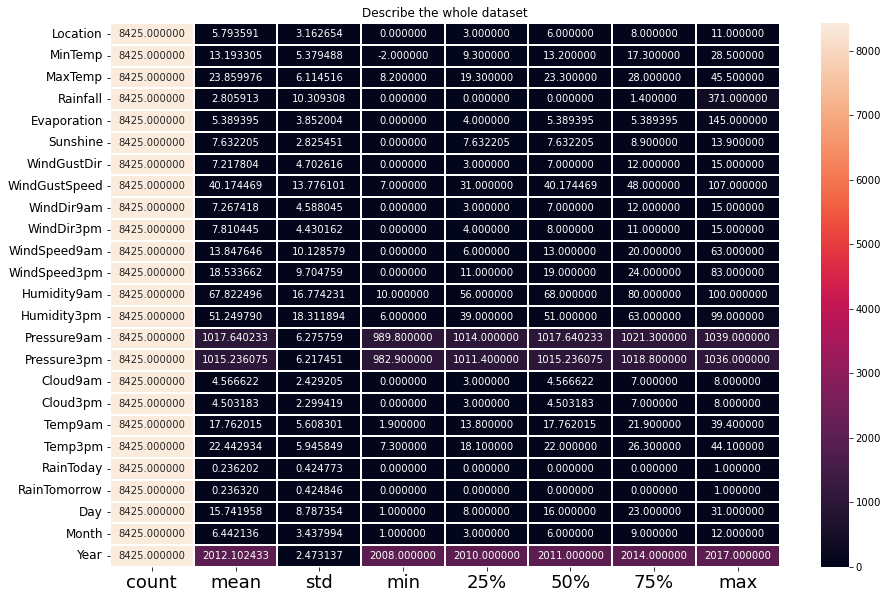

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

There is no missing values

The no of rows and columns are:
    * rows = 8425
    * columns= 25

The mean, standard deviation, minimum and maximum values are:
    
    * Location:
        mean= 5.79
        std=3.16
        minimum= 0.00
        maximum=11.00
        
    * MinTemp: 
        mean=13.19
        std=5.37
        minimum=-2.00
        maximum=28.50
        
    * MaxTemp:
        mean=23.85
        std=6.11
        minimum=8.20
        maximum=45.50
        
    *  Rainfall:
        mean=2.80
        std=10.30
        minimum=0.00
        maximum=3.71
        
    * Evaporation:
        mean=5.38
        std=3.85
        minimum=0.00
        maximum=145.00
        
    * Sunshine:
        mean=7.63
        std=2.82
        minimum=0.00
        maximum=13.90
        
    * WindGustDir:
        mean=7.21
        std=4.70
        minimum=0.00
        maximum=15.00
        
    * WindGustSpeed:
        mean=40.17
        std=13.77
        minimum=7.00
        maximum=107.00
        
    * WindDir9am:
        mean=7.26
        std=4.58
        minimum=0.00
        maximum=15.00
        
    * WindDir3pm:
        mean=7.81
        std=4.43
        minimum=0.00
        maximum=15.00
        
    * WindSpeed9am:
        mean=13.84
        std=10.12
        minimum=0.00
        maximum=63.00
        
    * WindSpeed3pm:
        mean=18.53
        std=9.70
        minimum=0.00
        maximum=83.00
        
    * Humidity9am:
        mean=67.82
        std=16.77
        minimum=10.00
        maximum=100.00
        
    * Humidity3pm:
        mean=51.24
        std=18.31
        minimum=6.00
        maximum=99.00
        
    * Pressure9am:
        mean=1017.64
        std=6.27
        minimum=989.80
        maximum=1039.00
        
    * Pressure3pm:
        mean=1015.23
        std=6.21
        minimum=982.90
        maximum=1036.00
        
    * Cloud9am:
        mean=4.56
        std=2.42
        minimum=0.00
        maximum=8.00
        
    * Cloud3pm:
        mean=4.50
        std=2.29
        minimum=0.00
        maximum=8.00
        
    * Temp9am:
        mean=17.76
        std=5.60
        minimum=1.90
        maximum=39.40
        
    * Temp3pm:
        mean=22.44
        std=5.94
        minimum=7.30
        maximum=44.10
        
    * RainToday:
        mean=0.23
        std=0.42
        minimum=0.00
        maximum=1.00
        
    * RainTomorrow:
        mean=0.23
        std=0.42
        minimum=0.00
        maximum=1.00
        
    * Day:
        mean=15.74
        std=8.78
        minimum=1.00
        maximum=31.00
        
    * Month:
        mean=6.44
        std=3.43
        minimum=1.00
        maximum=12.00
        
    * Year:
        mean=2012.10
        std=2.47
        minimum=2008.00
        maximum=2017.00

                                         Correlation

In [22]:
data.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,-0.027736,...,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824,-0.002019,-0.082407,0.486405
MinTemp,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,...,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.009446,-0.245854,0.044123
MaxTemp,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,-0.180622,...,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886,0.015608,-0.163253,0.119772
Rainfall,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,0.038560,...,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,-0.013760,-0.012244,0.006435
Evaporation,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,-0.047952,...,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.013597,0.004362,0.152708
Sunshine,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,-0.068553,...,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.004662,-0.006694,0.065374
WindGustDir,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,0.505799,...,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832,0.015683,0.034823,-0.088340
WindGustSpeed,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,0.071235,...,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127,-0.002876,0.051968,-0.042402
WindDir9am,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,0.249527,...,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860,-0.015154,0.012544,-0.014498
WindDir3pm,-0.027736,-0.147166,-0.180622,0.038560,-0.047952,-0.068553,0.505799,0.071235,0.249527,1.000000,...,-0.043681,0.075453,0.053986,-0.165072,-0.194463,0.100125,0.008918,0.003089,0.029384,-0.005812


<AxesSubplot:>

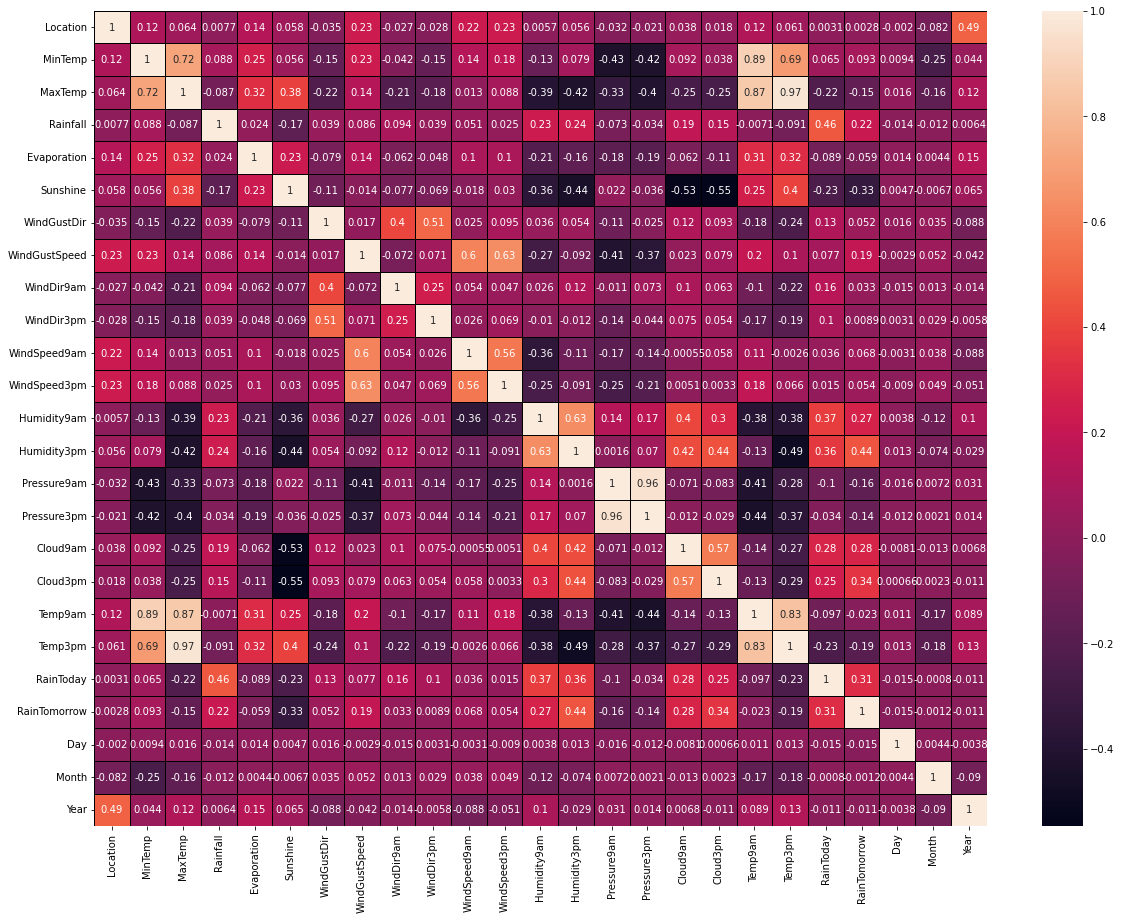

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

                   Check higher relation(above 70)of independent variable with the another independent variable 

<AxesSubplot:xlabel='MaxTemp', ylabel='Temp3pm'>

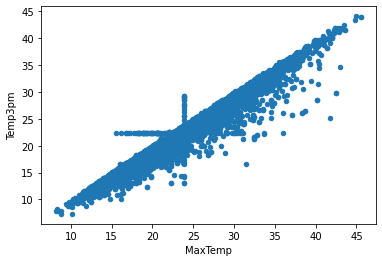

In [24]:
data.plot(kind='scatter', x='MaxTemp', y='Temp3pm',figsize=(6,4))

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

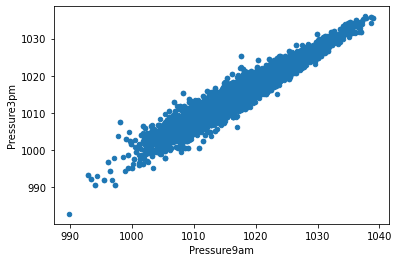

In [25]:
data.plot(kind='scatter', x='Pressure9am', y='Pressure3pm',figsize=(6,4))

<AxesSubplot:xlabel='MinTemp', ylabel='Temp9am'>

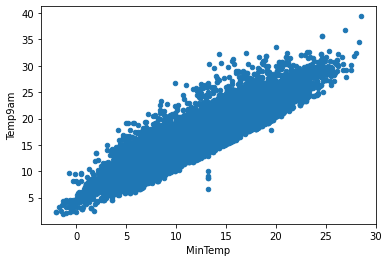

In [26]:
data.plot(kind='scatter', x='MinTemp', y='Temp9am',figsize=(6,4))

<AxesSubplot:xlabel='MaxTemp', ylabel='Temp9am'>

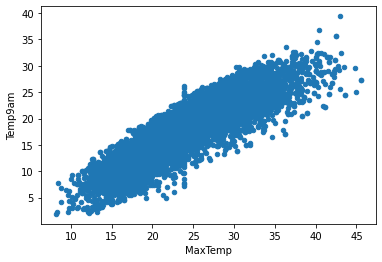

In [27]:
data.plot(kind='scatter', x='MaxTemp', y='Temp9am',figsize=(6,4))

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

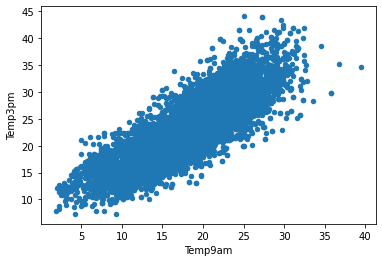

In [28]:
data.plot(kind='scatter', x='Temp9am', y='Temp3pm',figsize=(6,4))

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

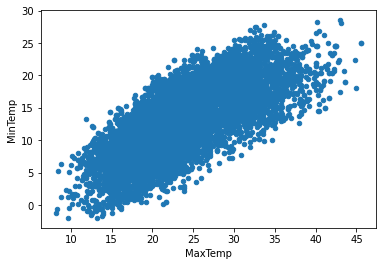

In [29]:
data.plot(kind='scatter', x='MaxTemp', y='MinTemp',figsize=(6,4))

All of the above graph shows positively relation with one feature to another feature variable.

                                                Outliers

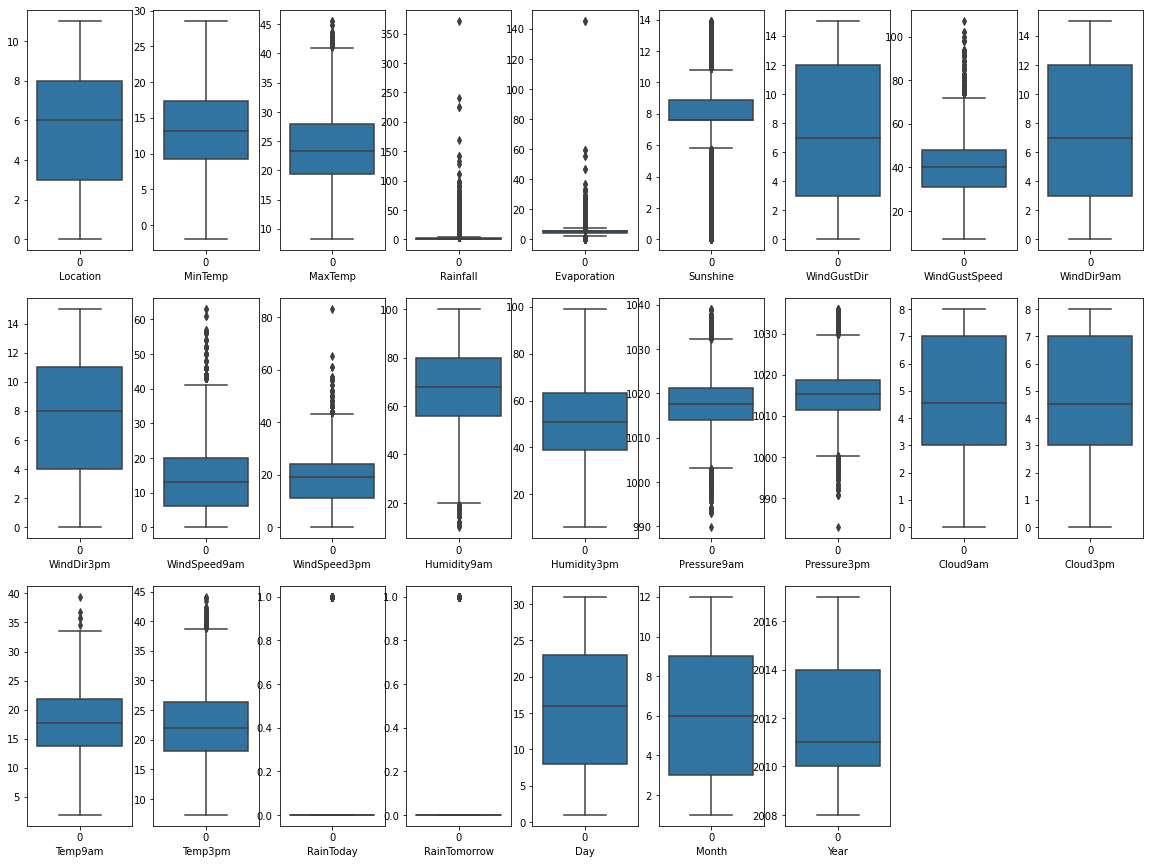

In [30]:
plt.figure(figsize=(20,15))
number = 1

for column in data:
    if number <=25:
        plt.subplot(3,9,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=10)
       
    number+=1
plt.show()   

Outliers are present in twelve of the columns that are:
    
    * MaxTemp
    * Rainfall
    * Evaporation
    * Sunshine
    * WindGustSpeed
    * WindSpeed9am
    * Windspeed3pm
    * Humidity9am 
    * Pressure9am
    * Pressure3pm
    * Temp9am
    * Temp3pm

                                                Skewness

In [31]:
data.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
Day               0.004260
Month             0.039388
Year              0.418663
dtype: float64

Take threshold range as (-0.5,0.5) for the Skewness:
    
Skewness is present in the columns are:
    
    * Rainfall
    * Evaporation
    * Sunshine
    * WindGustSpeed
    * WindSpeed9am

# Target Variable:   RainTomorrow

                                        Classification problem
forecast whether it will rain tomorrow or not

In [32]:
data_new=data
data_new.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.9,0.6,5.389395,7.632205,13.0,44.0,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,1,12,2008
1,1.0,7.4,25.1,0.0,5.389395,7.632205,14.0,44.0,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2,12,2008
2,1.0,12.9,25.7,0.0,5.389395,7.632205,15.0,46.0,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,3,12,2008
3,1.0,9.2,28.0,0.0,5.389395,7.632205,4.0,24.0,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,4,12,2008
4,1.0,17.5,32.3,1.0,5.389395,7.632205,13.0,41.0,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5,12,2008


In [33]:
data_new.corr()['RainTomorrow']

Location         0.002824
MinTemp          0.092942
MaxTemp         -0.152886
Rainfall         0.220021
Evaporation     -0.059012
Sunshine        -0.327731
WindGustDir      0.051832
WindGustSpeed    0.190127
WindDir9am       0.032860
WindDir3pm       0.008918
WindSpeed9am     0.068285
WindSpeed3pm     0.053568
Humidity9am      0.271222
Humidity3pm      0.444808
Pressure9am     -0.163985
Pressure3pm     -0.135242
Cloud9am         0.278943
Cloud3pm         0.344369
Temp9am         -0.023211
Temp3pm         -0.193805
RainToday        0.312929
RainTomorrow     1.000000
Day             -0.015461
Month           -0.001243
Year            -0.011066
Name: RainTomorrow, dtype: float64

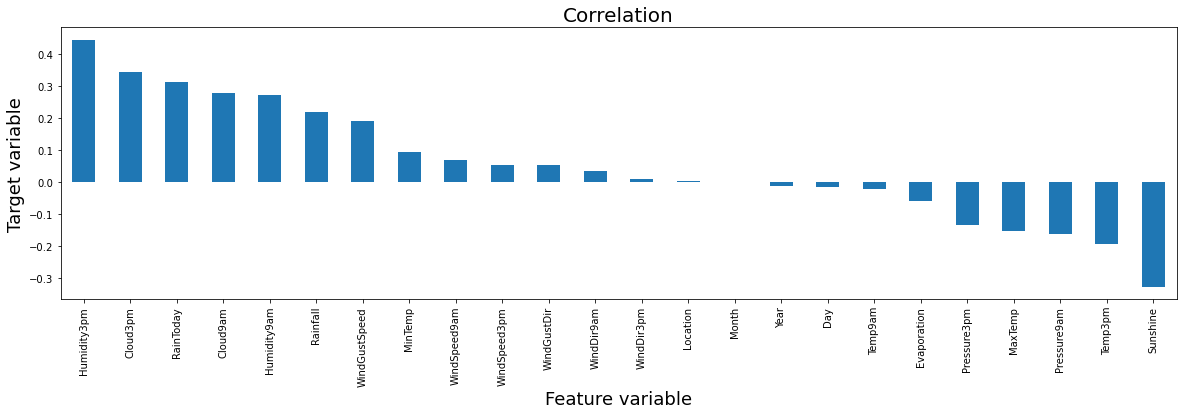

In [34]:
plt.figure(figsize=(20,5))
data_new.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

The correlation between feature and target variable:
    
    * Location has 0.2% positively correlation with the target variable.
    * MinTemp has 9% positively correlation with the target variable.      
    * MaxTemp has 15% negatively correlation with the target variable.      
    * Rainfall has 22% positively correlation with the target variable.      
    * Evaporation has 5% negatively correlation with the target variable.   
    * Sunshine has 32% negatively correlation with the target variable.      
    * WindGustDir has 5% positively correlation with the target variable.   
    * WindGustSpeed has 19% positively correlation with the target variable.
    * WindDir9am has 3% positively correlation with the target variable.      
    * WindDir3pm has 0.8% positively correlation with the target variable.      
    * WindSpeed9am has 6% positively correlation with the target variable.  
    * WindSpeed3pm has 5% positively correlation with the target variable.  
    * Humidity9am has 27% positively correlation with the target variable.   
    * Humidity3pm has 44% positively correlation with the target variable.
    * Pressure9am has 16% negatively correlation with the target variable.
    * Pressure3pm has 13% negatively correlation with the target variable.
    * Cloud9am has 27% positively correlation with the target variable.
    * Cloud3pm has 34% positively correlation with the target variable.
    * Temp9am has 2% negatively correlation with the target variable.       
    * Temp3pm has 19% negatively correlation with the target variable.      
    * RainToday has 31% positively correlation with the target variable.     
    * Day has 1% negatively correlation with the target variable.             
    * Month has 0.1% negatively correlation with the target variable.         
    * Year has 1% negatively correlation with the target variable.  

In [35]:
x=data_new.drop(['RainTomorrow'],axis=1)
y=data_new['RainTomorrow']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame() 
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.561195,Location
1,8.508145,MinTemp
2,26.411141,MaxTemp
3,1.314567,Rainfall
4,1.211523,Evaporation
5,1.830262,Sunshine
6,1.597337,WindGustDir
7,2.418378,WindGustSpeed
8,1.347192,WindDir9am
9,1.486463,WindDir3pm


In seven columns there is VIF greater than five,so we drop upto four columns iteratively.If still we get higher vif so we 
consider our orignal data, otherwise we accept the data where we get all vif smaller than five.

Here we try to drop Temp3pm column.

In [36]:
data_new=data_new.drop(['Temp3pm'],axis=1)

x=data_new.drop(['RainTomorrow'],axis=1)
y=data_new['RainTomorrow']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.560227,Location
1,8.460573,MinTemp
2,9.689374,MaxTemp
3,1.311257,Rainfall
4,1.210949,Evaporation
5,1.830195,Sunshine
6,1.593872,WindGustDir
7,2.402109,WindGustSpeed
8,1.346326,WindDir9am
9,1.485204,WindDir3pm


In [37]:
data_new=data_new.drop(['Pressure9am'],axis=1)

x=data_new.drop(['RainTomorrow'],axis=1)
y=data_new['RainTomorrow']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.560158,Location
1,8.311839,MinTemp
2,9.297500,MaxTemp
3,1.311239,Rainfall
4,1.207695,Evaporation
5,1.829069,Sunshine
6,1.581028,WindGustDir
7,2.381692,WindGustSpeed
8,1.326270,WindDir9am
9,1.402069,WindDir3pm


In [38]:
data_new=data_new.drop(['Temp9am'],axis=1)

x=data_new.drop(['RainTomorrow'],axis=1)
y=data_new['RainTomorrow']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.558182,Location
1,4.384884,MinTemp
2,5.431622,MaxTemp
3,1.309979,Rainfall
4,1.206418,Evaporation
5,1.824830,Sunshine
6,1.579289,WindGustDir
7,2.342153,WindGustSpeed
8,1.326238,WindDir9am
9,1.401219,WindDir3pm


In [39]:
data_new=data_new.drop(['MaxTemp'],axis=1)

x=data_new.drop(['RainTomorrow'],axis=1)
y=data_new['RainTomorrow']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.557853,Location
1,1.589217,MinTemp
2,1.308509,Rainfall
3,1.201646,Evaporation
4,1.771248,Sunshine
5,1.578252,WindGustDir
6,2.341049,WindGustSpeed
7,1.287851,WindDir9am
8,1.396452,WindDir3pm
9,1.972129,WindSpeed9am


                                         Removing Outliers

In [40]:
x=data_new.drop(['RainTomorrow'],axis=1)
y=data_new['RainTomorrow']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([  12,   52,   52,   62,  123,  267,  381,  381,  431,  462,  563,
        568,  602,  683,  699,  713,  748,  770,  796,  797,  802,  928,
        935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148,
       1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411,
       1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665,
       1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043,
       2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265,
       2429, 2488, 2500, 2505, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
       2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898,
       2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953,
       2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059, 3066, 3067,
       3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099,
       3101, 3141, 3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3185,
       3206, 3212, 3212, 3213, 3221, 3227, 3234, 3

In [42]:
data_new1=data_new[(z<3).all(axis=1)]

In [43]:
print("Old data frame:",data_new.shape)
print("New data frame:",data_new1.shape)
print("Total dropped rows:",data_new.shape[0]-data_new1.shape[0])

Old data frame: (8425, 21)
New data frame: (8023, 21)
Total dropped rows: 402


In [44]:
loss_percentage=(8425-8023)/8425*100
print(loss_percentage,'%')

4.771513353115727 %


There is only a loss of 4% on removing the outliers,so we remove them 

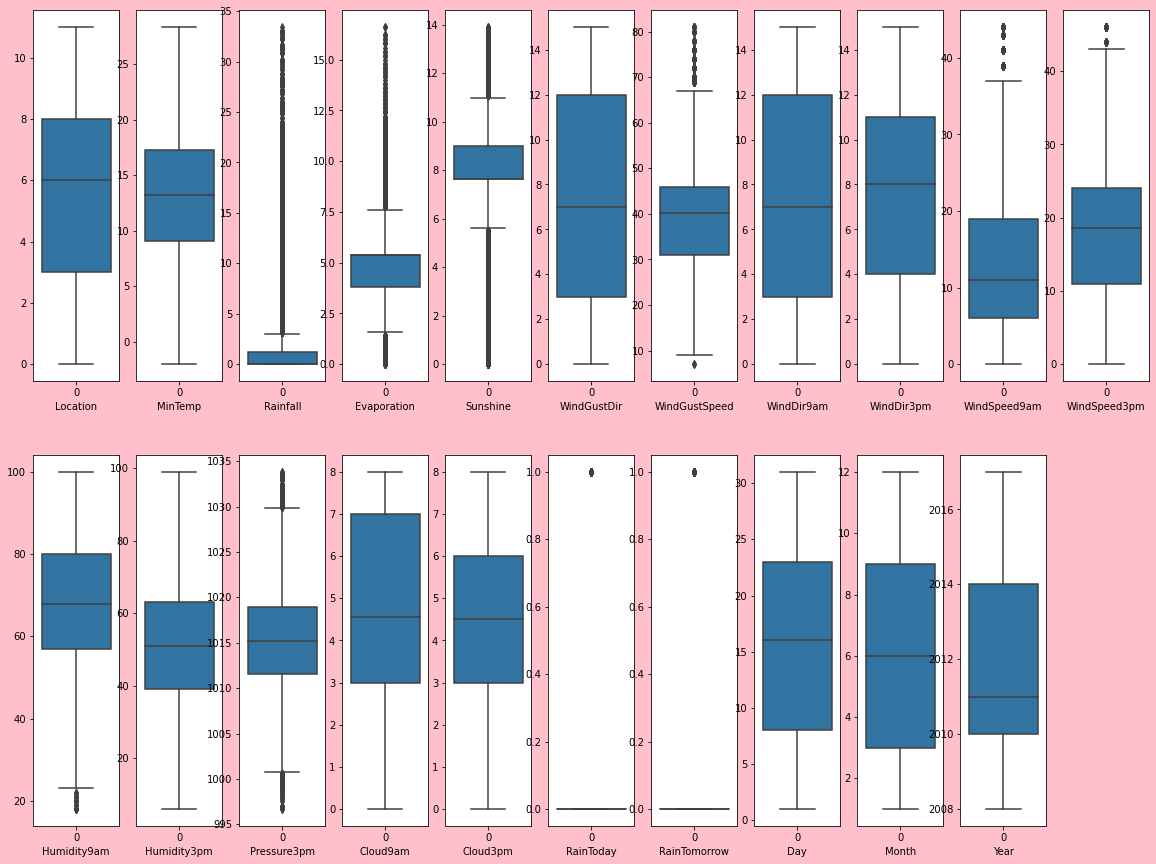

In [45]:
plt.figure(figsize=(20,15),facecolor='pink')
number = 1

for column in data_new1:
    if number <=21:
        plt.subplot(2,11,number)
        ax = sns.boxplot(data=data_new1[column])
        plt.xlabel(column,fontsize=10)
       
    number+=1
plt.show()   

                                            Removing Skewness

In [46]:
data_new1['Rainfall']=np.sqrt(data_new1['Rainfall'])
data_new1['Evaporation']=np.sqrt(data_new1['Evaporation'])
data_new1['Sunshine']=pow(data_new1['Sunshine'],2)
data_new1['WindGustSpeed']=np.sqrt(data_new1['WindGustSpeed'])
data_new1['WindSpeed9am']=np.sqrt(data_new1['WindSpeed9am'])

In [47]:
data_new1.skew()

Location        -0.042196
MinTemp         -0.078777
Rainfall         1.896492
Evaporation     -0.402299
Sunshine         0.779211
WindGustDir      0.112748
WindGustSpeed    0.000724
WindDir9am       0.162595
WindDir3pm      -0.127117
WindSpeed9am    -0.516782
WindSpeed3pm     0.300200
Humidity9am     -0.231544
Humidity3pm      0.114244
Pressure3pm      0.057442
Cloud9am        -0.356037
Cloud3pm        -0.265704
RainToday        1.307264
RainTomorrow     1.299633
Day              0.004034
Month            0.055613
Year             0.431460
dtype: float64

Still Skewness is present in these columns:
    
    * Rainfall
    * Sunshine
    * WindSpeed9am
    
Now we drop those columns    

In [48]:
data_new1=data_new1.drop(['Rainfall','Sunshine','WindSpeed9am'],axis=1)
data_new1.head()

,Location,MinTemp,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,2.321507,13.0,6.633250,13.0,14.0,24.0,71.0,22.0,1007.1,8.000000,4.503183,0.0,0.0,1,12,2008
1,1.0,7.4,2.321507,14.0,6.633250,6.0,15.0,22.0,44.0,25.0,1007.8,4.566622,4.503183,0.0,0.0,2,12,2008
2,1.0,12.9,2.321507,15.0,6.782330,13.0,15.0,26.0,38.0,30.0,1008.7,4.566622,2.000000,0.0,0.0,3,12,2008
3,1.0,9.2,2.321507,4.0,4.898979,9.0,0.0,9.0,45.0,16.0,1012.8,4.566622,4.503183,0.0,0.0,4,12,2008
4,1.0,17.5,2.321507,13.0,6.403124,1.0,7.0,20.0,82.0,33.0,1006.0,7.000000,8.000000,0.0,0.0,5,12,2008


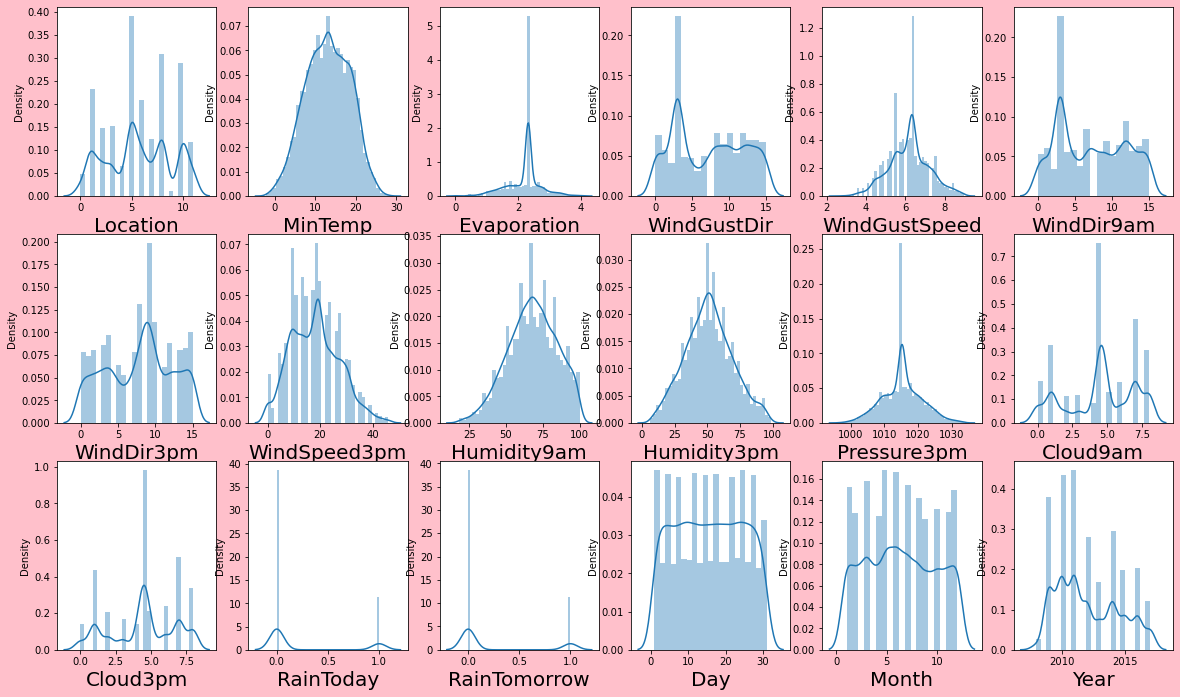

In [49]:
plt.figure(figsize=(20,16),facecolor='pink')
plotnumber =1

for column in data_new1:
    if plotnumber <=21:
        ax = plt.subplot(4,6,plotnumber)
        sns.distplot(data_new1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()   

                                               Model Testing

In [50]:
x=data_new1.drop(['RainTomorrow'],axis=1)
y=data_new1['RainTomorrow']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

                                   First Oversample the imbalanced data

In [51]:
!pip install imbalanced-learn

In [52]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [53]:
x_scaled.shape,y.shape

((8023, 17), (8023,))

In [54]:
Oversample=SMOTE(0.80)
x_scaled,y=Oversample.fit_resample(x_scaled,y)

In [55]:
x_scaled.shape,y.shape

((11154, 17), (11154,))

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size = 0.20,random_state =41)
print("The no. classes before fit {}".format(Counter(y_train)))

The no. classes before fit Counter({0.0: 4941, 1.0: 3982})


In [57]:
y_test.value_counts()

0.0    1256
1.0     975
Name: RainTomorrow, dtype: int64

Now the data is balanced for the classification process

                                             Logistic Regression

In [58]:
lor=LogisticRegression()

In [59]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lor.fit(x_train,y_train)
    pred_train=lor.predict(x_train)
    pred_test=lor.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 77.13773394598229
Testing accuracy score: 75.75078440161363


The model perform very well
random state 1
Training accuracy score: 76.94721506219881
Testing accuracy score: 75.9300761990139


The model perform very well
random state 2
Training accuracy score: 76.72307519892414
Testing accuracy score: 77.40923352756612


The model perform very well
random state 3
Training accuracy score: 76.74548918525159
Testing accuracy score: 76.96100403406544


The model perform very well
random state 4
Training accuracy score: 76.49893533564945
Testing accuracy score: 77.36441057821605


The model perform very well
random state 5
Training accuracy score: 76.89118009638014
Testing accuracy score: 75.97489914836396


The model perform very well
random state 6
Training accuracy score: 76.61100526728679
Testing accuracy score: 77.76781712236665


The model perform very well
random state 7
Training accuracy score: 76.8463521237252
Testin

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=11)  

In [63]:
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 78.48498431196774


In [64]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1059  221]
 [ 259  692]]


In [65]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82      1280
         1.0       0.76      0.73      0.74       951

    accuracy                           0.78      2231
   macro avg       0.78      0.78      0.78      2231
weighted avg       0.78      0.78      0.78      2231



In [66]:
for j in range(2,10):
    cv_score=cross_val_score(lor,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7100591715976332


At cross fold 3 the cv score is 0.7038730500268962


At cross fold 4 the cv score is 0.6924096020799071


At cross fold 5 the cv score is 0.7057654774850104


At cross fold 6 the cv score is 0.7025282409897794


At cross fold 7 the cv score is 0.7299722290577829


At cross fold 8 the cv score is 0.7294291201925301


At cross fold 9 the cv score is 0.7336453985032444




In [67]:
lorscore=cross_val_score(lor,x_scaled,y,cv=9)
lorc=lorscore.mean()
print('cross val score:',lorc*100)

cross val score: 73.36453985032443


                                            K Neighbors Classifier

In [68]:
knn= KNeighborsClassifier()

In [70]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 90.1602600022414
Testing accuracy score: 85.97041685342896


The model perform very well
random state 1
Training accuracy score: 90.1602600022414
Testing accuracy score: 85.16360376512775


The model perform very well
random state 2
Training accuracy score: 89.99215510478538
Testing accuracy score: 85.38771851187809


The model perform very well
random state 3
Training accuracy score: 90.01456909111285
Testing accuracy score: 85.9255939040789


The model perform very well
random state 4
Training accuracy score: 90.11543202958646
Testing accuracy score: 83.72926938592559


The model perform very well
random state 5
Training accuracy score: 90.04819007060406
Testing accuracy score: 85.47736441057822


The model perform very well
random state 6
Training accuracy score: 89.62232433038217
Testing accuracy score: 85.29807261317795


The model perform very well
random state 7
Training accuracy score: 90.20508797489633
Testing

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=26) 

In [72]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 86.68758404303003


In [73]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1000  229]
 [  68  934]]


In [74]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      1229
         1.0       0.80      0.93      0.86      1002

    accuracy                           0.87      2231
   macro avg       0.87      0.87      0.87      2231
weighted avg       0.88      0.87      0.87      2231



In [75]:
for j in range(2,10):
    cv_score=cross_val_score(knn,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.6273982427828582


At cross fold 3 the cv score is 0.6816388739465662


At cross fold 4 the cv score is 0.6682001771665999


At cross fold 5 the cv score is 0.7170565191261333


At cross fold 6 the cv score is 0.7011834319526628


At cross fold 7 the cv score is 0.7359892102783879


At cross fold 8 the cv score is 0.7527500732787213


At cross fold 9 the cv score is 0.7651333165548583




In [76]:
knnscore=cross_val_score(knn,x_scaled,y,cv=9)
knnc=knnscore.mean()
print('cross val score:',knnc*100)

cross val score: 76.51333165548583


                                      Random Forest Classifier

In [77]:
rfc=RandomForestClassifier()

In [78]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 92.38009861048857


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 92.6042133572389


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 92.96279695203944


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 93.18691169878977


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 92.6042133572389


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 92.20080681308829


The model perform very well
random state 6
Training accuracy score: 100.0
Testing accuracy score: 92.64903630658897


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 92.33527566113851


The model perform very well
random state 8
Training accura

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=11)

In [80]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 93.59031824294038


In [81]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1213   67]
 [  76  875]]


In [82]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      1280
         1.0       0.93      0.92      0.92       951

    accuracy                           0.94      2231
   macro avg       0.93      0.93      0.93      2231
weighted avg       0.94      0.94      0.94      2231



In [83]:
for j in range(2,10):
    cv_score=cross_val_score(rfc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.5601577909270217


At cross fold 3 the cv score is 0.6507082660928815


At cross fold 4 the cv score is 0.6544904389708904


At cross fold 5 the cv score is 0.7507669146333865


At cross fold 6 the cv score is 0.7039627039627039


At cross fold 7 the cv score is 0.7926633223615551


At cross fold 8 the cv score is 0.8038626885320086


At cross fold 9 the cv score is 0.8335560820525283




In [84]:
rfcscore=cross_val_score(rfc,x_scaled,y,cv=9)
rfcc=rfcscore.mean()
print('cross val score:',rfcc*100)

cross val score: 83.14959456840265


                                     Decision Tree Classifier

In [85]:
clf=DecisionTreeClassifier()

In [86]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 87.80815777678171


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 86.64276109367997


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 88.16674137158225


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 87.22545943523083


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 86.82205289108023


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 86.64276109367997


The model perform very well
random state 6
Training accuracy score: 100.0
Testing accuracy score: 87.4047512326311


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 85.9255939040789


The model perform very well
random state 8
Training accura

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 57)

In [88]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 87.94262662483192


In [89]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1112  136]
 [ 133  850]]


In [90]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1248
         1.0       0.86      0.86      0.86       983

    accuracy                           0.88      2231
   macro avg       0.88      0.88      0.88      2231
weighted avg       0.88      0.88      0.88      2231



In [91]:
for j in range(2,10):
    cv_score=cross_val_score(clf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.558812981889905


At cross fold 3 the cv score is 0.5940469786623633


At cross fold 4 the cv score is 0.6207775679511588


At cross fold 5 the cv score is 0.7035125514308169


At cross fold 6 the cv score is 0.6594046978662362


At cross fold 7 the cv score is 0.7298179647987189


At cross fold 8 the cv score is 0.7494540092459747


At cross fold 9 the cv score is 0.7742059876012856




In [92]:
clfscore=cross_val_score(clf,x_scaled,y,cv=9)
clfc=clfscore.mean()
print('cross val score:',clfc*100)

cross val score: 78.65749057657206


                                              SVC

In [93]:
svc=SVC()

In [94]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    svc.fit(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 87.71713549254734
Testing accuracy score: 83.32586284177499


The model perform very well
random state 1
Training accuracy score: 87.24644177967052
Testing accuracy score: 84.5360824742268


The model perform very well
random state 2
Training accuracy score: 87.31368373865291
Testing accuracy score: 85.29807261317795


The model perform very well
random state 3
Training accuracy score: 87.12316485486944
Testing accuracy score: 84.98431196772748


The model perform very well
random state 4
Training accuracy score: 87.51540961560013
Testing accuracy score: 83.41550874047512


The model perform very well
random state 5
Training accuracy score: 87.72834248571108
Testing accuracy score: 85.02913491707754


The model perform very well
random state 6
Training accuracy score: 87.29126975232545
Testing accuracy score: 84.76019722097715


The model perform very well
random state 7
Training accuracy score: 87.44816765661773
Testi

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 76)

In [96]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 86.01523980277902


In [97]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[1060  152]
 [ 160  859]]


In [98]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1212
         1.0       0.85      0.84      0.85      1019

    accuracy                           0.86      2231
   macro avg       0.86      0.86      0.86      2231
weighted avg       0.86      0.86      0.86      2231



In [99]:
for j in range(2,10):
    cv_score=cross_val_score(svc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.6333154025461718


At cross fold 3 the cv score is 0.6825354133046441


At cross fold 4 the cv score is 0.6733126861882586


At cross fold 5 the cv score is 0.7168778705280063


At cross fold 6 the cv score is 0.692487000179308


At cross fold 7 the cv score is 0.7395731819630764


At cross fold 8 the cv score is 0.7490752739595707


At cross fold 9 the cv score is 0.7574233903512197




In [100]:
svcscore=cross_val_score(svc,x_scaled,y,cv=9)
svcc=svcscore.mean()
print('cross val score:',svcc*100)

cross val score: 75.74233903512197


The accuracy_score and cv_score of all the classification models:

    * Logistic Regression
        accuracy_score: 78.48
        cv_score: 73.36

    * K Neighbors Classifier
        accuracy_score: 86.68
        cv_score: 76.51

    * Decision Tree Classifier
        accuracy_score: 87.94
        cv_score: 78.65

    * Random Forest Classifier
        accuracy_score: 93.59
        cv_score: 83.14 

    * SVC
        accuracy_score: 86.50
        cv_score: 75.74
        
All the give better accuracy score but Random Forest Classifier is best in all of them, so we select that model for hyper 
parameter tuning.

              Modeling of Random Forest Classifier
                  
                                        Hyper parameter tuning

In [101]:
rfc=RandomForestClassifier()

In [102]:
parameters={'max_features':['auto','sqrt'],
            'max_depth': range(2,100),
            'criterion':['gini','entropy '],
            'min_samples_split':range(2,10)}

In [103]:
GCV=GridSearchCV(rfc,parameters,cv=9,n_jobs=-1)
GCV.fit(x_train,y_train) 
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 55,
 'max_features': 'auto',
 'min_samples_split': 2}

In [104]:
clf = RandomForestClassifier(min_samples_split=2,criterion='gini',max_features='auto',max_depth=55)
clf.fit(x_train,y_train) 
y_pred = clf.predict(x_test)
r2_score(y_test,y_pred)*100

72.90344834287158

                                    Plot ROC_AUC curve and find the AUC value 

In [105]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

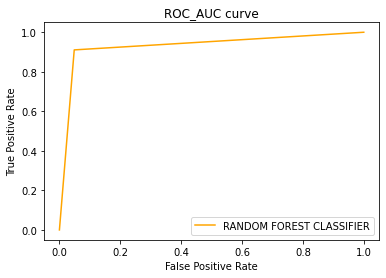

AUC_score 93.10084467720571


In [106]:
plt.plot(fpr,tpr,color='orange',label='RANDOM FOREST CLASSIFIER')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred)*100
print("AUC_score",auc_score)

accuracy_score=72.90 and AUC_score=93.10, which is better.

                                               Save file

In [107]:
import joblib

joblib.dump(GCV.best_params_,"RainTommorow_Weather_Forecasting.pkl")

['RainTommorow_Weather_Forecasting.pkl']

                                                 Conclusion

In [108]:
Prediction=pd.DataFrame({'Actual data':y_test,"Predicted data":y_pred})
Prediction

,Actual data,Predicted data
2396,0.0,0.0
8165,1.0,0.0
2474,0.0,0.0
9193,1.0,1.0
2439,0.0,0.0
...,...,...
1732,0.0,0.0
7333,0.0,0.0
8141,1.0,1.0
10300,1.0,1.0


# Target Variable= Rainfall

                                         Regression Problem
                                         
    

In [109]:
new_data=data
new_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.9,0.6,5.389395,7.632205,13.0,44.0,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,1,12,2008
1,1.0,7.4,25.1,0.0,5.389395,7.632205,14.0,44.0,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2,12,2008
2,1.0,12.9,25.7,0.0,5.389395,7.632205,15.0,46.0,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,3,12,2008
3,1.0,9.2,28.0,0.0,5.389395,7.632205,4.0,24.0,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,4,12,2008
4,1.0,17.5,32.3,1.0,5.389395,7.632205,13.0,41.0,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5,12,2008


In [110]:
new_data.corr()['Rainfall']

Location         0.007693
MinTemp          0.087684
MaxTemp         -0.087451
Rainfall         1.000000
Evaporation      0.023517
Sunshine        -0.169432
WindGustDir      0.038812
WindGustSpeed    0.086000
WindDir9am       0.093821
WindDir3pm       0.038560
WindSpeed9am     0.050631
WindSpeed3pm     0.024791
Humidity9am      0.228800
Humidity3pm      0.235444
Pressure9am     -0.072668
Pressure3pm     -0.033649
Cloud9am         0.185444
Cloud3pm         0.150760
Temp9am         -0.007083
Temp3pm         -0.090687
RainToday        0.461106
RainTomorrow     0.220021
Day             -0.013760
Month           -0.012244
Year             0.006435
Name: Rainfall, dtype: float64

The correlation between feature and target variable:    
    
    * Location has 0.7% positively correlation with the target variable.      
    * MinTemp has 8% positively correlation with the target variable.      
    * MaxTemp has 8% negatively correlation with the target variable.          
    * Evaporation has 2% positively correlation with the target variable.   
    * Sunshine has 16% negatively correlation with the target variable.      
    * WindGustDir has 3% positively correlation with the target variable.    
    * WindGustSpeed has 8% positively correlation with the target variable. 
    * WindDir9am has 9% positively correlation with the target variable.    
    * WindDir3pm has 3% positively correlation with the target variable.     
    * WindSpeed9am has 5% positively correlation with the target variable.   
    * WindSpeed3pm has 2% positively correlation with the target variable.
    * Humidity9am has 22% positively correlation with the target variable.
    * Humidity3pm has 23% positively correlation with the target variable.
    * Pressure9am has 7% negatively correlation with the target variable.   
    * Pressure3pm has 3% negatively correlation with the target variable.   
    * Cloud9am has 18% positively correlation with the target variable.      
    * Cloud3pm has 15% positively correlation with the target variable.      
    * Temp9am has 0.7% negatively correlation with the target variable.       
    * Temp3pm has 9% negatively correlation with the target variable.      
    * RainToday has 46% positively correlation with the target variable.     
    * RainTomorrow has 28% positively correlation with the target variable.  
    * Day has 1% negatively correlation with the target variable.              
    * Month has 1% negatively correlation with the target variable.         
    * Year has 0.6% positively correlation with the target variable.  

                                       Variance Inflation Factor

In [111]:
x=new_data.drop(['Rainfall'],axis=1)
y=new_data['Rainfall']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.569336,Location
1,8.510602,MinTemp
2,26.382766,MaxTemp
3,1.204286,Evaporation
4,1.842500,Sunshine
5,1.598317,WindGustDir
6,2.489177,WindGustSpeed
7,1.344550,WindDir9am
8,1.487265,WindDir3pm
9,2.055286,WindSpeed9am


In [112]:
new_data=new_data.drop(['Temp3pm'],axis=1)

x=new_data.drop(['Rainfall'],axis=1)
y=new_data['Rainfall']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.568396,Location
1,8.463941,MinTemp
2,9.709237,MaxTemp
3,1.203488,Evaporation
4,1.842408,Sunshine
5,1.594602,WindGustDir
6,2.472974,WindGustSpeed
7,1.343834,WindDir9am
8,1.486077,WindDir3pm
9,2.054692,WindSpeed9am


In [113]:
new_data=new_data.drop(['Pressure9am'],axis=1)

x=new_data.drop(['Rainfall'],axis=1)
y=new_data['Rainfall']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.568382,Location
1,8.318697,MinTemp
2,9.326301,MaxTemp
3,1.200193,Evaporation
4,1.840830,Sunshine
5,1.581389,WindGustDir
6,2.448687,WindGustSpeed
7,1.323855,WindDir9am
8,1.403903,WindDir3pm
9,2.053203,WindSpeed9am


In [114]:
new_data=new_data.drop(['Temp9am'],axis=1)

x=new_data.drop(['Rainfall'],axis=1)
y=new_data['Rainfall']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.566605,Location
1,4.400710,MinTemp
2,5.447589,MaxTemp
3,1.199100,Evaporation
4,1.837045,Sunshine
5,1.579692,WindGustDir
6,2.411413,WindGustSpeed
7,1.323837,WindDir9am
8,1.403043,WindDir3pm
9,2.035644,WindSpeed9am


In [115]:
new_data=new_data.drop(['MaxTemp'],axis=1)

x=new_data.drop(['Rainfall'],axis=1)
y=new_data['Rainfall']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,1.566435,Location
1,1.586540,MinTemp
2,1.193936,Evaporation
3,1.780818,Sunshine
4,1.578443,WindGustDir
5,2.409115,WindGustSpeed
6,1.286552,WindDir9am
7,1.398711,WindDir3pm
8,1.970301,WindSpeed9am
9,1.913768,WindSpeed3pm


Now, multicollinearity is not exist in the data.

                                          Removing Outliers

In [116]:
x=new_data.drop(['Rainfall'],axis=1)
y=new_data['Rainfall']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [117]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([  12,   52,   52,   62,  123,  267,  381,  381,  563,  568,  602,
        683,  748,  980,  980, 1189, 1535, 1587, 1644, 1665, 1898, 1903,
       1945, 2016, 2028, 2043, 2074, 2186, 2219, 2219, 2230, 2500, 2505,
       2827, 2835, 2849, 2855, 2863, 2869, 2877, 2883, 2891, 2897, 2905,
       2911, 2919, 2925, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
       3051, 3058, 3059, 3066, 3067, 3067, 3067, 3068, 3070, 3082, 3082,
       3082, 3089, 3089, 3099, 3099, 3101, 3141, 3150, 3153, 3157, 3164,
       3167, 3172, 3172, 3178, 3185, 3206, 3212, 3212, 3213, 3221, 3227,
       3234, 3248, 3260, 3303, 3449, 3449, 3450, 3458, 3471, 3491, 3557,
       3602, 3603, 3617, 3679, 3687, 3701, 3707, 3715, 3721, 3729, 3735,
       3743, 3749, 3757, 3763, 3771, 3777, 3785, 3791, 3799, 3805, 3813,
       3819, 3827, 3841, 3903, 3910, 3911, 3918, 3919, 3919, 3919, 3920,
       3922, 3934, 3934, 3934, 3941, 3941, 3951, 3951, 3953, 3993, 4002,
       4005, 4009, 4016, 4019, 4024, 4024, 4030, 4

In [118]:
new_data1=new_data[(z<3).all(axis=1)]

In [119]:
print("Old data frame:",new_data.shape)
print("New data frame:",new_data1.shape)
print("Total dropped rows:",new_data.shape[0]-new_data1.shape[0])

Old data frame: (8425, 21)
New data frame: (8133, 21)
Total dropped rows: 292


In [120]:
loss_percentage=(8425-8133)/8425*100
print(loss_percentage,'%')

3.465875370919881 %


There is only a loss of 3% so we remove those outliers from the data.

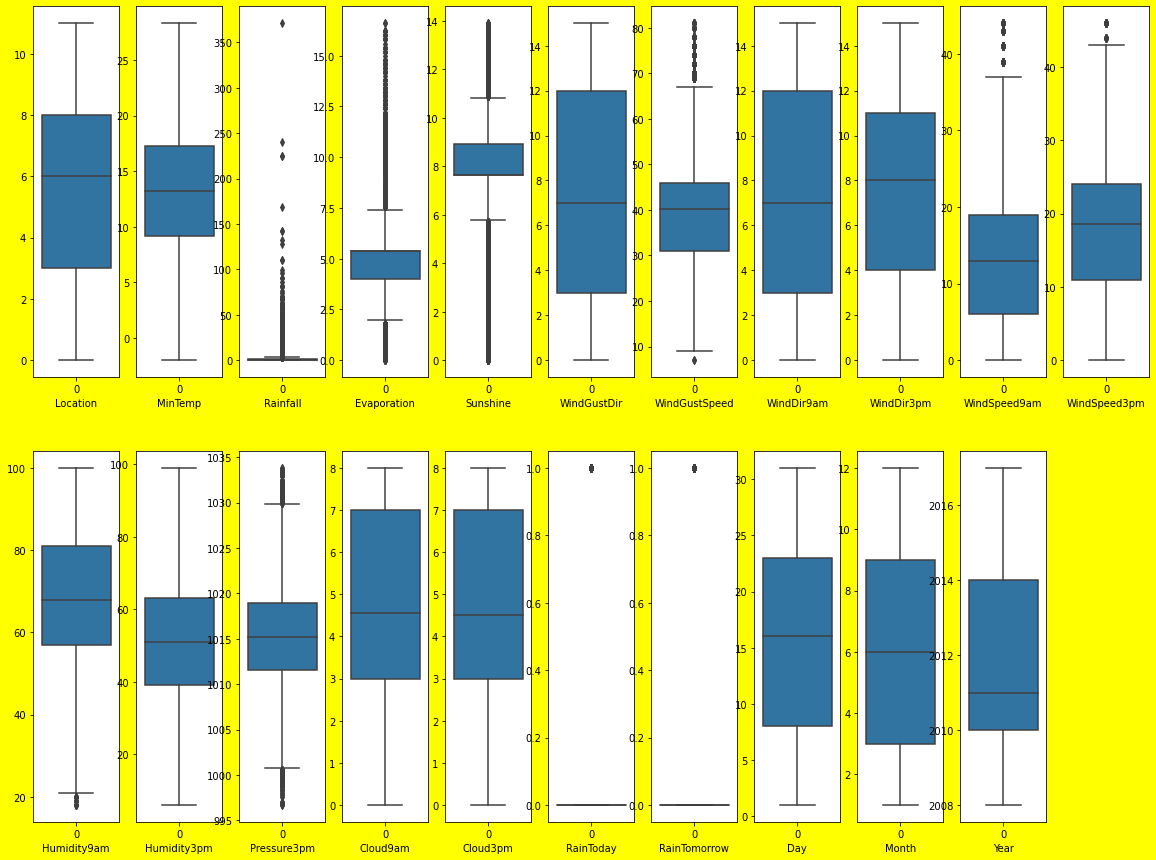

In [121]:
plt.figure(figsize=(20,15),facecolor='yellow')
number = 1

for column in new_data1:
    if number <=21:
        plt.subplot(2,11,number)
        ax = sns.boxplot(data=new_data1[column])
        plt.xlabel(column,fontsize=10)
       
    number+=1
plt.show()   

Outliers are present in seven of the columns that are:
     
    * Evaporation
    * Sunshine
    * WindGustSpeed
    * WindSpeed9am
    * Windspeed3pm
    * Humidity9am 
    * Pressure3pm  

                                         Removing Skewness

In [122]:
new_data1['Evaporation']=np.sqrt(new_data1['Evaporation'])
new_data1['Sunshine']=pow(new_data1['Sunshine'],2)
new_data1['WindGustSpeed']=np.sqrt(new_data1['WindGustSpeed'])
new_data1['WindSpeed9am']=np.sqrt(new_data1['WindSpeed9am'])

In [123]:
new_data1.skew()

Location         -0.037542
MinTemp          -0.089034
Rainfall         13.834584
Evaporation      -0.410218
Sunshine          0.775164
WindGustDir       0.111339
WindGustSpeed     0.001465
WindDir9am        0.154500
WindDir3pm       -0.130836
WindSpeed9am     -0.517650
WindSpeed3pm      0.300983
Humidity9am      -0.237258
Humidity3pm       0.114640
Pressure3pm       0.060198
Cloud9am         -0.364126
Cloud3pm         -0.272641
RainToday         1.237587
RainTomorrow      1.257719
Day               0.006798
Month             0.059761
Year              0.432417
dtype: float64

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

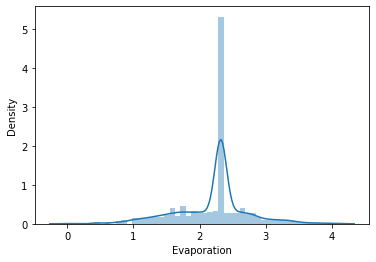

In [124]:
sns.distplot(new_data1['Evaporation'])

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

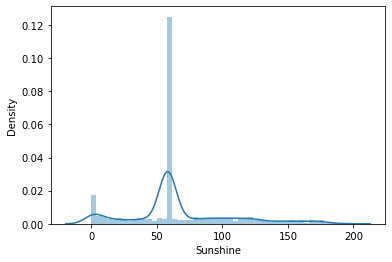

In [125]:
sns.distplot(new_data1['Sunshine'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

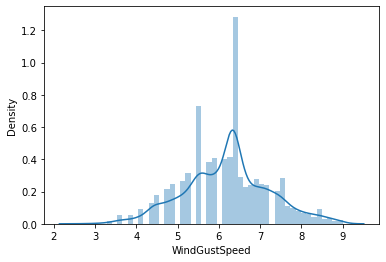

In [126]:
sns.distplot(new_data1['WindGustSpeed'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

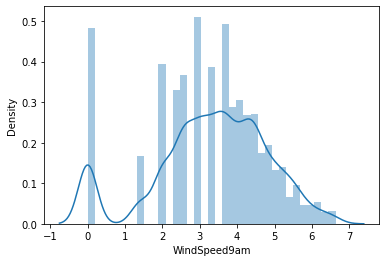

In [127]:
sns.distplot(new_data1['WindSpeed9am'])

Skewness is still present in the columns are:

    * Sunshine
    * WindSpeed9am
    
Now,we drop those columns    

In [128]:
new_data1=new_data1.drop(['Sunshine','WindSpeed9am'],axis=1)
new_data1.head()

,Location,MinTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,0.6,2.321507,13.0,6.633250,13.0,14.0,24.0,71.0,22.0,1007.1,8.000000,4.503183,0.0,0.0,1,12,2008
1,1.0,7.4,0.0,2.321507,14.0,6.633250,6.0,15.0,22.0,44.0,25.0,1007.8,4.566622,4.503183,0.0,0.0,2,12,2008
2,1.0,12.9,0.0,2.321507,15.0,6.782330,13.0,15.0,26.0,38.0,30.0,1008.7,4.566622,2.000000,0.0,0.0,3,12,2008
3,1.0,9.2,0.0,2.321507,4.0,4.898979,9.0,0.0,9.0,45.0,16.0,1012.8,4.566622,4.503183,0.0,0.0,4,12,2008
4,1.0,17.5,1.0,2.321507,13.0,6.403124,1.0,7.0,20.0,82.0,33.0,1006.0,7.000000,8.000000,0.0,0.0,5,12,2008


                                            Model Testing

In [129]:
x=new_data1.drop(['Rainfall'],axis=1)
y=new_data1['Rainfall']

scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

                                       Linear Regression

In [130]:
lr=LinearRegression()

In [131]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 21.5618634581885
Testing accuracy score: 32.905317228409544


The model perform very well
random state 1
Training accuracy score: 22.092120694892458
Testing accuracy score: 26.555535101761684


The model perform very well
random state 2
Training accuracy score: 21.61301876046856
Testing accuracy score: 33.16261815817931


The model perform very well
random state 3
Training accuracy score: 26.913820733571814
Testing accuracy score: 15.579514210425172


The model perform very well
random state 4
Training accuracy score: 21.46267188728963
Testing accuracy score: 31.526882487975648


The model perform very well
random state 5
Training accuracy score: 21.838452173216027
Testing accuracy score: 27.772215623254482


The model perform very well
random state 6
Training accuracy score: 21.122886726489256
Testing accuracy score: 33.79323839912982


The model perform very well
random state 7
Training accuracy score: 22.02543005330

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =9)

In [133]:
pred_test=lr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 23.36555046345248


In [134]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.23002405559207056


At cross fold 3 the cv score is 0.23525207845824836


At cross fold 4 the cv score is 0.23733096565921985


At cross fold 5 the cv score is 0.24324190999431217


At cross fold 6 the cv score is 0.2498541318860311


At cross fold 7 the cv score is 0.23955816161977866


At cross fold 8 the cv score is 0.2595963165180631


At cross fold 9 the cv score is 0.2510163746590175




In [135]:
lrscore=cross_val_score(lr,x_scaled,y,cv=8)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 25.95963165180631


In [136]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 2.9208248048732655
Mean square error: 71.25179674019907
Root mean square error: 8.44107793710016


                                       Decision Tree Regressor

In [137]:
dtr=DecisionTreeRegressor()

In [138]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: -167.16741079661296


random state 1
Training accuracy score: 100.0
Testing accuracy score: -17.317504414002414


random state 2
Training accuracy score: 100.0
Testing accuracy score: -8.794432130259233


random state 3
Training accuracy score: 100.0
Testing accuracy score: 7.300876846590631


random state 4
Training accuracy score: 100.0
Testing accuracy score: -27.83772658530559


random state 5
Training accuracy score: 100.0
Testing accuracy score: 18.17551254557571


random state 6
Training accuracy score: 100.0
Testing accuracy score: -263.3566432632336


random state 7
Training accuracy score: 100.0
Testing accuracy score: -92.97980756006913


random state 8
Training accuracy score: 100.0
Testing accuracy score: 10.527433267108055


random state 9
Training accuracy score: 100.0
Testing accuracy score: -79.3115014300169


random state 10
Training accuracy score: 100.0
Testing accuracy score: 29.40717517625687




In [139]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 93)

In [140]:
pred_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_test)
print("R2 score:",dtrs*100)

R2 score: 77.02104368013745


In [141]:
for j in range(2,10):
    cv_score=cross_val_score(dtr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -0.7078405686461062


At cross fold 3 the cv score is -1.5195742278193183


At cross fold 4 the cv score is -0.6286955139782191


At cross fold 5 the cv score is -0.2973719319735049


At cross fold 6 the cv score is 0.057743540221772825


At cross fold 7 the cv score is -0.09986166097921702


At cross fold 8 the cv score is 0.04171180832315599


At cross fold 9 the cv score is -0.4382934465593763




In [144]:
dtrscore=cross_val_score(dtr,x_scaled,y,cv=8)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

cross val score: 9.736112592882861


In [145]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.3547815404301046
Mean square error: 21.202874176269344
Root mean square error: 4.604657878308587


                                      Random Forest Regressor

In [146]:
rfr=RandomForestRegressor()

In [147]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfr.fit(x_train,y_train)
    pred_train=rfr.predict(x_train)
    pred_test=rfr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 91.14122884081524
Testing accuracy score: 44.068096288708645


random state 1
Training accuracy score: 90.78260958694611
Testing accuracy score: 52.60931680003452


random state 2
Training accuracy score: 91.81958341775453
Testing accuracy score: 48.16551656531921


random state 3
Training accuracy score: 92.71154586300912
Testing accuracy score: 26.962206836211998


random state 4
Training accuracy score: 91.0430367441473
Testing accuracy score: 44.47363681358023


random state 5
Training accuracy score: 91.13766124835675
Testing accuracy score: 54.268282270054755


random state 6
Training accuracy score: 90.93357320674743
Testing accuracy score: 40.575201721015276


random state 7
Training accuracy score: 90.9140367290826
Testing accuracy score: 28.514015508522927


random state 8
Training accuracy score: 88.83655113573758
Testing accuracy score: 52.75091974121404


random state 9
Training accuracy score: 92.10147010894778
Testing accuracy scor

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =31)

In [153]:
pred_test=rfr.predict(x_test)
rfrs=r2_score(y_test,pred_test)
print("R2 score for testing:",rfrs*100)

R2 score for testing: 84.60018750733845


In [154]:
for j in range(2,10):
    cv_score=cross_val_score(rfr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.161179736588356


At cross fold 3 the cv score is 0.26178990325145796


At cross fold 4 the cv score is 0.26825299133360403


At cross fold 5 the cv score is 0.42403568768566535


At cross fold 6 the cv score is 0.393549855400231


At cross fold 7 the cv score is 0.41869263025351444


At cross fold 8 the cv score is 0.4576581929116823


At cross fold 9 the cv score is 0.4243585517345038




In [155]:
rfrscore=cross_val_score(rfr,x_scaled,y,cv=8)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

cross val score: 45.61263468258729


In [156]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.9867627396420893
Mean square error: 15.031394346478928
Root mean square error: 3.8770342204420802


                                            Ada Boost Regressor

In [157]:
ada= AdaBoostRegressor()

In [158]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,1))
    print('\n')

random state 0
Training accuracy score: -202.3
Testing accuracy score: -523.4


random state 1
Training accuracy score: -169.8
Testing accuracy score: -262.0


random state 2
Training accuracy score: -171.6
Testing accuracy score: -523.9


random state 3
Training accuracy score: -70.1
Testing accuracy score: -30.7


random state 4
Training accuracy score: -165.6
Testing accuracy score: -318.1


random state 5
Training accuracy score: -255.1
Testing accuracy score: -387.2


random state 6
Training accuracy score: -213.5
Testing accuracy score: -455.2


random state 7
Training accuracy score: -226.5
Testing accuracy score: -260.8


random state 8
Training accuracy score: -251.6
Testing accuracy score: -181.6


random state 9
Training accuracy score: -121.3
Testing accuracy score: -282.4


random state 10
Training accuracy score: -200.6
Testing accuracy score: -166.2


random state 11
Training accuracy score: -219.7
Testing accuracy score: -178.8


random state 12
Training accuracy score:

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =14)

In [163]:
pred_test=ada.predict(x_test)
adas=r2_score(y_test,pred_test)
print("R2 score:",adas*100)

R2 score: -0.43721027664789247


In [164]:
for j in range(2,10):
    cv_score=cross_val_score(ada,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is -1.3941860061719489


At cross fold 3 the cv score is -1.8264468182181988


At cross fold 4 the cv score is -2.0905062894465196


At cross fold 5 the cv score is -3.3768969629484076


At cross fold 6 the cv score is -2.3374197779947754


At cross fold 7 the cv score is -2.3079664268127074


At cross fold 8 the cv score is -2.1374833669346387


At cross fold 9 the cv score is -2.202672920576567




In [165]:
adascore=cross_val_score(ada,x_scaled,y,cv=3)
adac=adascore.mean()
print('cross val score:',adac*100)

cross val score: -198.37486110550753


In [166]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 8.074113003094613
Mean square error: 200.6126253590464
Root mean square error: 14.163778639863247


                                       Gradient Boosting Regressor

In [167]:
gb= GradientBoostingRegressor()

In [168]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 63.40592122954924
Testing accuracy score: 30.314829938062992


random state 1
Training accuracy score: 63.13096740454349
Testing accuracy score: 49.15505545097552


random state 2
Training accuracy score: 64.3817474033884
Testing accuracy score: 27.474137237290964


random state 3
Training accuracy score: 66.4851719577779
Testing accuracy score: 19.529299991742512


random state 4
Training accuracy score: 64.50908420746461
Testing accuracy score: 26.916225029787398


random state 5
Training accuracy score: 65.18556755224164
Testing accuracy score: 46.8806989069121


random state 6
Training accuracy score: 64.73986194342777
Testing accuracy score: 35.089289453709505


random state 7
Training accuracy score: 64.89499574005033
Testing accuracy score: 27.39195056970649


random state 8
Training accuracy score: 62.44539358707553
Testing accuracy score: 51.114200311297985


random state 9
Training accuracy score: 69.40180811043074
Testing accuracy scor

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =30)

In [170]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

R square score 71.35384498909028


In [171]:
for j in range(2,10):
    cv_score=cross_val_score(gb,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.0867114261138312


At cross fold 3 the cv score is 0.20182209377551552


At cross fold 4 the cv score is 0.24606573530897094


At cross fold 5 the cv score is 0.29210318649194345


At cross fold 6 the cv score is 0.28704382497558767


At cross fold 7 the cv score is 0.33931810949503965


At cross fold 8 the cv score is 0.2812035850460935


At cross fold 9 the cv score is 0.31565899589438745




In [172]:
gbscore=cross_val_score(gb,x_scaled,y,cv=7)
gbc=gbscore.mean()
print('cross val score:',gbc*100)

cross val score: 34.27766723821036


In [173]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 1.996295150906941
Mean square error: 27.798426246129022
Root mean square error: 5.272421288756147


The value of r2 score and cv for the 5 machine learning model are:

    * Linear Regression

            r2_score: 23.36
            cv_score: 25.95
                
    * Decission Tree Regressor

            r2_score: 77.02
            cv_score: 9.73
                
    * Random Forest Regressor

            r2_score: 91.85
            cv_score: 46.41
                
    * AdaBoostRegressor
           
            r2_score: -27.72
            cv_score: -171.80
                
    * Gradient Boosting Regressor

            r2_score: 72.01
            cv_score: 34.56

    Modeling  of Random Forest Regressor
    
                                     Regressor Problem

In [225]:
 rfr=RandomForestRegressor()

In [243]:
parameters = {'max_features':['auto','sqrt','log2'], 
             'random_state':range(0,100),
             'max_depth':range(2,100),
             'min_samples_split':range(2,5)}

In [191]:
GCV=RandomizedSearchCV(rfr,parameters,cv=8,n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'random_state': 19,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 31}

In [249]:
clf = RandomForestRegressor(random_state=19,min_samples_split=2,max_features='log2',max_depth=31)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
r2_score(y_test,y_pred)*100

62.68608877585664

After lots of tunning we will not get r2_score more than 62.68,so we consider that value of the r2_score.

                              Plot a graph b/w actual and predicted value

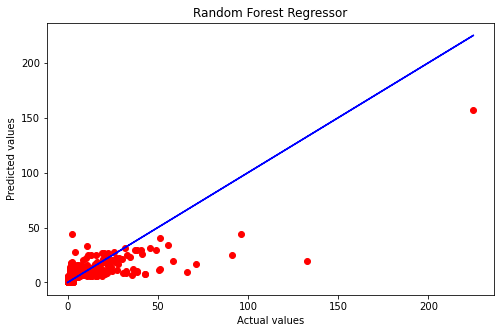

In [254]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor')                                                                                
plt.show()

Some values have higher differences and most of the values are scatter around the test values.

                                          Save the file

In [257]:
joblib.dump(GCV.best_params_,"Rainfall_Weather_Forecasting.pkl")

['Rainfall_Weather_Forecasting.pkl']

                                            Conclusion

In [259]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_pred})
Prediction

,Actual_value,Predicted_value
8228,0.000000,0.002000
1255,5.200000,6.770000
6436,0.000000,0.046059
2178,8.800000,20.026000
7569,8.200000,9.488000
...,...,...
5245,2.805913,2.020139
2084,0.000000,0.192059
8092,0.000000,0.012000
575,0.000000,0.088059
